In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

c:\Users\ASUS\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
!pip install seaborn

# Import custoer dataset

Load customer dataset form scv file and store it in a dataframe

In [3]:
df = pd.read_csv("E:/belajar-coding/vokajoki/customer.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     Gordon          619        US  Female   42   
1             2    15647311     Duncan          608        UK  Female   41   
2             3    15619304         Hu          502        US  Female   42   
3             4    15701354   Docherty          699        US  Female   39   
4             5    15737888    Brookes          850        UK  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771        US    Male   39   
9996       9997    15569892  Johnstone          516        US    Male   35   
9997       9998    15584532        Liu          709        US  Female   36   
9998       9999    15682355  Sabbatini          772     Japan    Male   42   
9999      10000    15628319     Walker          792        US  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# EDA

## Step 1 : Understand the big picture of the dataset

In [4]:
df.shape

(10000, 14)

Get desctriptive statistics

In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

Get the data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Get dupliacted rows

In [7]:
df.duplicated().sum()

0

## Step 2: Understand Variables

### Catergorical variables (nominal and ordinal)

Get all categorical variables and count each value

In [8]:
cat_df = df.select_dtypes(exclude='number')
cat_df

Surname Geography  Gender
0        Gordon        US  Female
1        Duncan        UK  Female
2            Hu        US  Female
3      Docherty        US  Female
4       Brookes        UK  Female
...         ...       ...     ...
9995   Obijiaku        US    Male
9996  Johnstone        US    Male
9997        Liu        US  Female
9998  Sabbatini     Japan    Male
9999     Walker        US  Female

[10000 rows x 3 columns]

In [9]:
for col in cat_df.columns:
    if col != 'Surname':
        print(df[col].value_counts())
        fig = px.histogram(cat_df, x=col)
        fig.show()

US       5014
Japan    2509
UK       2477
Name: Geography, dtype: int64


Male      5457
Female    4543
Name: Gender, dtype: int64


### Numarical Variables (Ratio or Interval)

Draw box plot

In [10]:
fig = px.box(df,y ='Balance', x='Geography', color='Gender', points='all')
fig.show()

In [11]:
for col in df.select_dtypes(include='number').columns:
    fig = px.box(df, y=col, x='Geography', color='Gender', points='all')
    fig.show()

Violin Plot

In [12]:
fig = px.violin(df, y='Balance', x='Geography', color='Gender', box=True, hover_data=df.columns)
fig.show()

### Histogram

In [13]:
fig = px.histogram(df, x='Age', color='Gender')
fig.show()

### Multivariated Analysis

In [14]:
sns.pairplot(df)
plt.show()

### Corelation heatmap

/var/folders/70/r12dx25s78q2j51qcdtt2_wr0000gp/T/ipykernel_1788/3898775983.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



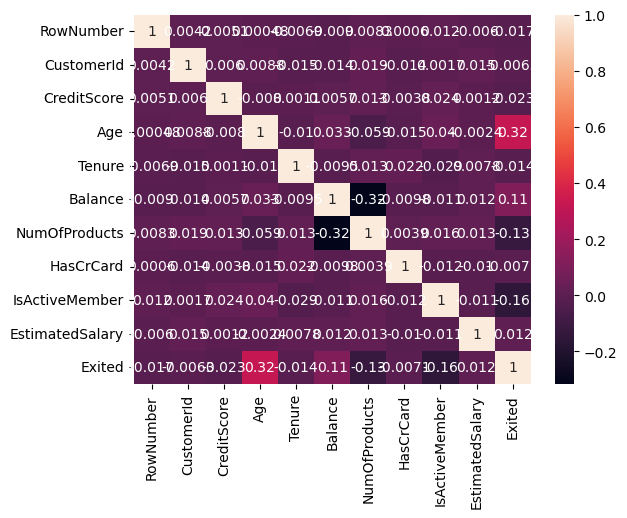

In [ ]:

sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()